In [8]:
from sklearn.model_selection import cross_validate,GridSearchCV
#from sklearn import cross_validate,grid_search, metrics, ensemble
from sklearn import metrics, ensemble
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
#reading training data
df = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/train.csv')
df = df.sample(frac=0.4)

In [10]:
#using songs and members dataset
songs = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [11]:
#removing null values
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.334636
source_screen_name         5.629036
source_type                0.291904
target                     0.000000
song_length                0.001288
genre_ids                  1.613674
artist_name                0.001288
composer                  22.711538
lyricist                  43.098991
language                   0.001965
city                       0.000000
bd                         0.000000
gender                    40.153990
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [12]:
#removing NA values from df

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [13]:
# creating a column of registration_init_date  using month, year and day

df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


# creating expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [14]:
# conversion into categorical values

df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [15]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df = df.drop(['expiration_date', 'lyricist'], 1)

In [16]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
#creating decision tree classifier
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
model.fit(df[df.columns[df.columns != 'target']], df.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [19]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [20]:
len(df)

2950967

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
y = df['target'].values
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])

In [22]:
model.score(df[df.columns[df.columns != 'target']], df.target)
#deciding parameters on the basis of scores

0.8694949824921797

In [23]:
df_test=pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/test.csv')
songs = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes

In [24]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [25]:
df.columns

Index(['msno', 'song_id', 'source_type', 'target', 'song_length',
       'artist_name', 'composer', 'registration_init_time',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [26]:
df_test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [27]:
del df_test['source_screen_name']
del df_test['genre_ids']

del df_test['language']
del df_test['city']
del df_test['bd']
del df_test['gender']
del df_test['registered_via']
del df_test['source_system_tab']
del df_test['registration_init_time_year']
del df_test['registration_init_time_month']
del df_test['expiration_date_year']
del df_test['expiration_date_month']

In [28]:
df_test.columns

Index(['id', 'msno', 'song_id', 'source_type', 'song_length', 'artist_name',
       'composer', 'registration_init_time', 'registration_init_time_day',
       'expiration_date_day'],
      dtype='object')

In [29]:
len(df_test.columns)

10

In [30]:
len(df.columns)

10

In [31]:
len(df_test)

2556790

In [32]:
predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [33]:
predictions = predictions/3

submission = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/sample_submission.csv')
#submission = submission.sample(frac=0.6)
submission.target=predictions
submission.to_csv('decision.csv',index=False)

In [34]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

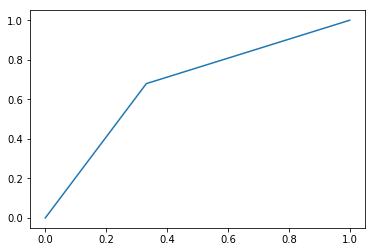

In [35]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

In [36]:
plt.show()

In [37]:
roc_auc

0.6736950156599796

In [38]:
X_array=df['target'].values

In [39]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(X_array,predictions_roc, target_names=target_names))

ValueError: Found input variables with inconsistent numbers of samples: [1770580, 1180387]